In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# If you want to clear outputs for a "fresh look", go to Edit and hit "clear outputs"
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --

from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa

from jove.Def_NFA import *
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help

OVERVIEW OF ALL QUESTIONS (points subject to slight changes):

* Question 1 (25%)
  - Part a: Define L_eq and L_neq in Jove
    - Difficulty: Medium: Needs careful thought about ranges (10%)
  - Part b: See if their union is the universe (easy) (3%)
  - Part c: Drawing a specific conclusion (easy) (2%)
  - Part d: Finding the missing (easy) (3%)
  - Part e: Mathematical description of missing
    - Difficulty: Medium: Need careful thinking of all the cases (7%)

* Question 2 (30%)
  - Part a: Building a DFA called Even010
    - Difficulty: Enjoyably medium: Fun debugging for all ages! (15%)
  - Part b: DFA animation
    - Difficulty: Naah. This is fun - totally worth it! (5%)
  - Part c: Systematic testing (easy) (5%)
  - Part d: Random-testing
    - Difficulty: None.
    - Value: Now you are getting proficient at testing  machines in many different ways. Valuable for all of us, software engineers! (3%)
  - Part e: Comparative bullets (super-easy but useful documentation) (2%)

* Question 3 (20%)
  - Part a: Building a DFA called Ends010 (enjoyable and medium-easy) (10%)
  - Part b: Computing the intersection (fun one-liner) (5%)
  - Part c: Minimization of the intersection (fun and interesting outcome) (5%)

* Question 4 (25%)
  - Part a: Find states eliminated (easy and informative; answers may vary) (5%)
  - Part b: Explanation of why getting rid of these states is OK (just a spot-check; not a proof) (20%)

## Question 1:

This problem is based on Problem 7, Page 26 of our textbook, but we will rename the languages to avoid some confusion, below.
    
Suppose we define the language
    
$$ L_{eq} = \{ 0^i 1^j \;:\; i,j\in Nat,\; and\; i=j \}$$  

(Note: Clearly we could have written this as
$$ L_{eq} = \{ 0^i 1^i \;:\; i\in Nat  \}$$
but we use the first form to set our question more smoothly.)
    
Now consider the language $L_{neq}$
    
$$ L_{neq} = \{ 0^i 1^j  \;:\; i,j\in Nat,\; and\; i\neq j \}$$

Your task is to explore whether $L_{eq}$ and $L_{neq}$ are complements.
While you may already know the answer (pretend you don't!), we require you to work through some questions that will help you conclude one way or the other with much more certainty.

###Part a:
Define $L_{eq}$ in Jove for $\Sigma=\{0,1\}$ and the universe being star(\{0,1\}, 6). This universe immediately helps you compute the length of the longest strings in it. (__Make sure that $L_{eq}$ includes all the strings in this universe__, and __none outside of it__.). Use this information in defining $L_{eq}$ below.  (__Again, make sure that the range(...) operator used in defining $L_{eq}$ is right.__)

Following the definition of $L_{eq}$, define $L_{neq}$ in the same manner, in the space provided below. Make sure that all eligible strings from the universe are included (and none outside the universe are included).


REMOVE IN FINAL: However, observe that for $L_{neq}$ you may have to run $i$ and $j$ over a larger range and insist that $(i+j < 7)$, in order to get all eligible strings of length <=6 that are in $L_{neq}$.

In [2]:
Sigma = {'0','1'}

# Define L_eq as follows:
# L_eq = { "0"* i + "1" * j for i in range(...fill...) for j in range(...) if ...as necessary ... }

#L_eq =  ...definition...

# from https://stackoverflow.com/questions/23116911/all-permutations-of-a-string-in-python-recursive
# we can't just construct it like above because it would only return strings like 0011 or 000111, but 110010 or whatever would also be valid
def perms(s):
    if(len(s)==0): return ['']
    if(len(s)==1): return [s]
    result=[]
    for i,v in enumerate(s):
        result += [v+p for p in perms(s[:i]+s[i+1:])]
    return result

L_eq = { p for s in { "0" * i + "1" * j for i in range(4) for j in range(4) if i == j } for p in perms(s) } # only need to go to 4 because otherwise they wont be equal no matter what

L_eq

L_eq # to print L_eq and make sure it meets the stated conditions

{'',
 '000111',
 '001011',
 '0011',
 '001101',
 '001110',
 '01',
 '010011',
 '0101',
 '010101',
 '010110',
 '0110',
 '011001',
 '011010',
 '011100',
 '10',
 '100011',
 '1001',
 '100101',
 '100110',
 '1010',
 '101001',
 '101010',
 '101100',
 '1100',
 '110001',
 '110010',
 '110100',
 '111000'}

In [3]:
# L_{neq} = "Your Definition Here, as above"

L_neq =  { p for s in { "0" * i + "1" * j for i in range(7) for j in range(7) if (i != j and i + j < 7) } for p in perms(s) }

L_neq # to print L_neq

{'0',
 '00',
 '000',
 '0000',
 '00000',
 '000000',
 '000001',
 '00001',
 '000010',
 '000011',
 '0001',
 '00010',
 '000100',
 '000101',
 '00011',
 '000110',
 '001',
 '0010',
 '00100',
 '001000',
 '001001',
 '00101',
 '001010',
 '00110',
 '001100',
 '00111',
 '001111',
 '010',
 '0100',
 '01000',
 '010000',
 '010001',
 '01001',
 '010010',
 '01010',
 '010100',
 '01011',
 '010111',
 '011',
 '01100',
 '011000',
 '01101',
 '011011',
 '0111',
 '01110',
 '011101',
 '01111',
 '011110',
 '011111',
 '1',
 '100',
 '1000',
 '10000',
 '100000',
 '100001',
 '10001',
 '100010',
 '10010',
 '100100',
 '10011',
 '100111',
 '101',
 '10100',
 '101000',
 '10101',
 '101011',
 '1011',
 '10110',
 '101101',
 '10111',
 '101110',
 '101111',
 '11',
 '110',
 '11000',
 '110000',
 '11001',
 '110011',
 '1101',
 '11010',
 '110101',
 '11011',
 '110110',
 '110111',
 '111',
 '1110',
 '11100',
 '111001',
 '11101',
 '111010',
 '111011',
 '1111',
 '11110',
 '111100',
 '111101',
 '11111',
 '111110',
 '111111'}

###Part b:

 Fill the code-cell below to compute the union of $L_{eq}$ and $L_{neq}$ using Jove's lunion function. Compare the result to the universe. Let the comparison result be called __Matches__.

In [4]:
help(lunion)

# Union = ...fill this using the lunion(...) Jove function ...

Union =  lunion(L_eq, L_neq)

# Matches = ...fill this...

Matches =  Union == lstar(Sigma, 6)

Matches # This must print either True or False

Help on function lunion in module jove.LangDef:

lunion(L1, L2)
    In : L1 (language : a set),
         L2 (language : a set).
    Out: L1 union L2 (language : a set).



True

###Part c:

Based on the value of Matches, draw your conclusion, filling the missing parts below.


* $L_{neq}$ is indeed the complement of $L_{eq}$ because ...fill this...

*  $L_{neq}$ is not the complement of $L_{eq}$ because ...fill this...

**Answer:** Trick question, there actually isn't enough information yet (purely based on Matches). We know $L_{eq} \cup L_{neq} = \Sigma^*$, but that would be true if there were overlap as well. We need to ensure that the languages also have no overlap:

In [5]:
Intersection = lint(L_eq, L_neq)

Matches = Intersection == set() # ensure the intersection is equivalent to the empty set, meaning there are no elements in both sets

Matches

True

Now we know that $L_{neq}$ is indeed the complement of $L_{eq}$ because both sets sum up to be equivalent to the unvierse, but there is no element that is in both sets.



###Part d:
If Matches is True, you are done. Else, find the language (set of strings) missing from $L_{neq}$ (with respect to the actual complement of the $L_{eq}$ set). Call this language LangMissed.

For the ease of debugging, it is best not to define LangMissed in one shot; you may set up intermediate definitions.

In [6]:
# Matches is True so we are done. Commenting things out so they dont mess w/ the runtime.

"YOUR PYTHON-3 CODE CALLING JOVE FUNCTIONS HERE. USE MULTIPLE LINES."

# LangMissed = "THE SET OF ALL STRINGS MISSED."

# LangMissed = ...express it suitably ...

# SigmaStar =  ...

#
# LangMissed = ...

# print("The strings missed are: ", LangMissed)



'YOUR PYTHON-3 CODE CALLING JOVE FUNCTIONS HERE. USE MULTIPLE LINES.'

###Part e:
Provide a fully mathematical expression (not Jove code) to define LangMissed.

You are required to construct it in the form of a multi-way concatenation (an answer of the form $Sigma^* \;-\; L_{eq}$ is not acceptable).

Your answer will look like $(L_1\; L_2 \; L_3 \; L_4 \; L_5)$. Note: it has to be a fully general description of all the things in LangMissed, and so it is very likely that you'll need all these five pieces  $L_1$ through $L_5$.

$L_1$ through $L_5$ will turn out to be $\Sigma^*$ or simple languages such as \{0\) and \{1\}. This $\Sigma^*$ is the fully general one, not a truncated $\Sigma^*$.

As a note, if you can write it as a shorter concatenation (less than five languages) that is fine. In any case, you must __explain__ your answers (no points w/o explanations for any mathematical question).







Answer = "A LATEX EXPRESSION THAT MARKDOWN TYPE-SETS NICELY AS A MATH EQUATION "

...FILL ME...

__Food for thought: Can this language be implemented as a DFA?__ Yes

## Question 2:

###Part a:
 DFA construction

Using Jove's markdown, define a DFA for the language $L$ of strings over alphabet $\{0,1\}$, where

$L$ = $ ( \;\;  \overline{ \{0,1\}^* \{010\}\{0,1\}^* }  \; \{010\} \; \overline{ \{0,1\}^*\{010\}\{0,1\}^*} \;\;   \{010\}  \;\;  )^*$


$L$ consists of

* an __arbitrary string not containing a 010__,
* then a 010
* then another __arbitrary string not containing a 010__
* then 010

all repeated zero or more times.

It is best to write out some stringsin $L$ before you finish the DFA.

* You must THOROUGHLY document your construction. See how to do this, as described in 00_Overview_Of_CS3100 where we also give you codes that help you test DFA.

Call this DFA by the name "Even010".

In [7]:
Even010 = md2mc('''
DFA

!! Put comments describing overall plan here. Look at 00_Overview_Of_CS3100 for commenting conventions

!! Plan:
!! Have a state for each arbitrary string
!! A sequence for each set of 010
!! A black hole state after the second 010

!! ... After key lines of the DFA, put short comments specific to the line ...
!! ... Also, group lines for each state in nice bunches ...

!! starting  : 0 -> somestate !! Line-level comments required for all important lines!

!! The state for the first arbitrary string
I_1     : 0 -> S_1_0   !! A 0 could be the start of the first 010
I_1     : 1 -> I_1     !! Otherwise keep waiting

!! States for the first 010
S_1_0   : 0 -> S_1_0   !! A 0 breaks the 010, but could be the start of a new one
S_1_0   : 1 -> S_1_01

S_1_01  : 0 -> S_1_010
S_1_01  : 1 -> I_1     !! Breaks the sequence

S_1_010 : 0 -> S_2_0   !! Could straightaway start the next one, where the second arbitrary string is empty
S_1_010 : 1 -> S_2     !! On a 1, go to the next waiting state

!! The state for the second arbitrary string
S_2     : 0 -> S_2_0   !! A 0 could be the start of the next 010
S_2     : 1 -> S_2

!! States for the first 010
S_2_0   : 0 -> S_2_0   !! A 0 breaks the 010, but could be the start of a new one
S_2_0   : 1 -> S_2_01

S_2_01  : 0 -> F_2_010
S_2_01  : 1 -> S_2     !! Breaks the sequence

!! The only final state, any further symbols make the string invalid
F_2_010 : 0 -> BH
F_2_010 : 1 -> BH

!! Black hole
BH      : 0 -> BH
BH      : 1 -> BH
''')

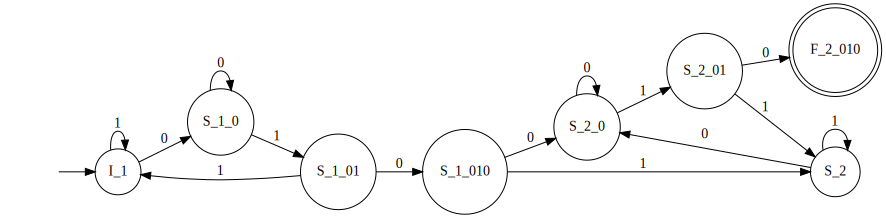

In [8]:
dotObj_dfa(Even010, FuseEdges=True)

###Part b:
 DFA animation: Animate the DFA you just built using the lists MustPassListOf5 and MustFailListOf5 defined below. Feed these one by one and run an animation. Leave the last frame of the animation, intact, so that we can grade easily.

 A common requirement for these random animations is to make them consist of strings of length at least 10 in both the "MustPass" and "MustFail" lists.

__Why make them this long?__ The idea is to cover some tests beyond what Part-C might cover. (It is unlikely that Part-C will hit this length group, so you are trying to be very sure!)

In [9]:
from jove.AnimateDFA import *
help(AnimateDFA)

 "help(AnimateDFA)" gives you info on how to use animations with DFA 
Help on class AnimateDFA in module jove.AnimateDFA:

class AnimateDFA(builtins.object)
 |  AnimateDFA(m_desc, FuseEdges=False, pick_start=False, max_width=10.0, accept_color='chartreuse3', reject_color='red', neutral_color='dodgerblue2')
 |  
 |  This is the DFA animation class.
 |  Call it with the DFA to be animated, and also FuseEdges=True/False
 |  to draw the DFA with edges either fused or not.
 |  For producing drawings in Colab, it is important to have these in
 |  every cell that calls animation.
 |  
 |  AnimateDFA(myDFA, FuseEdges='True/False')
 |  followed by
 |  display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
 |  
 |  Then the animation works in one's own install or Colab.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, m_desc, FuseEdges=False, pick_start=False, max_width=10.0, accept_color='chartreuse3', reject_color='red', 

Note that each Animation must be done in a separate cell. The import can be in the first such cell.

Then for each animation, have
- AnimateDFA(...)
- display(...)

Repeat this cell for each animation so that you can leave the final screen intact.

In [10]:
from jove.AnimateDFA import *
AnimateDFA(Even010, FuseEdges=False)

##--- ***** 100% IMPORTANT : in any animation code cell, you must execute this as the last command - a Colab bug workaround **** ---##
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [11]:
MustPassListOf5 = [
  '010010',
  '01101000111010',
  '11010010',
  '00110100011010',
  '01011111010'
] # define this

#-- Now, perform an animation for these 5 tests, leaving the final animation frame intact for grading.
#-- You must make the AnimateDFA call again and again, feeding a string from the above list, and leave the final result ready to view/grade
#--- In all animation code-cells, include the above "display" line
#--- Write down five acceptance tests in your own way, involving test strings of length at least 10.

for s in MustPassListOf5:
  AnimateDFA(Even010, FuseEdges=False)
  display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

MustFailListOf5 = [
    '',
    '01010',
    '010101010',
    '0100101',
    '1010'
] # define this

#-- Now, perform an animation for these 5 tests, leaving the final animation frame intact for grading.
#-- You must make the AnimateDFA call again and again, feeding a string from the above list, and leave the final result ready to view/grade
#--- In all animation code-cells, include the above "display" line
#--- Write down five rejecting tests in your own way, involving test strings of length at least 10.

for s in MustFailListOf5:
  AnimateDFA(Even010, FuseEdges=False)
  display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

###Part c:
 Testing the DFA systematically.

 __Systematic testing of any program consists of exhausting a space of small inputs first. Then you can test for some longer-length strings at random. Below, this opportunity is offered for you to practice!__

In [12]:
# Test the Even010 machine : The length of 2048 seems necessary to get far into the accepted list of strings

from jove.LangDef import *
TestStrings = [nthnumeric(i, ['0','1']) for i in range(2048)]

# Now, generate a printout of all accepted strings

[ (s, "Accepted") for s in TestStrings  if accepts_dfa(Even010, s)]



[('010010', 'Accepted'),
 ('0010010', 'Accepted'),
 ('0100010', 'Accepted'),
 ('0101010', 'Accepted'),
 ('1010010', 'Accepted'),
 ('00010010', 'Accepted'),
 ('00100010', 'Accepted'),
 ('00101010', 'Accepted'),
 ('01000010', 'Accepted'),
 ('01010010', 'Accepted'),
 ('01011010', 'Accepted'),
 ('10010010', 'Accepted'),
 ('10100010', 'Accepted'),
 ('10101010', 'Accepted'),
 ('11010010', 'Accepted'),
 ('000010010', 'Accepted'),
 ('000100010', 'Accepted'),
 ('000101010', 'Accepted'),
 ('001000010', 'Accepted'),
 ('001010010', 'Accepted'),
 ('001011010', 'Accepted'),
 ('010000010', 'Accepted'),
 ('010011010', 'Accepted'),
 ('010100010', 'Accepted'),
 ('010110010', 'Accepted'),
 ('010111010', 'Accepted'),
 ('011010010', 'Accepted'),
 ('100010010', 'Accepted'),
 ('100100010', 'Accepted'),
 ('100101010', 'Accepted'),
 ('101000010', 'Accepted'),
 ('101010010', 'Accepted'),
 ('101011010', 'Accepted'),
 ('110010010', 'Accepted'),
 ('110100010', 'Accepted'),
 ('110101010', 'Accepted'),
 ('111010010'

###Part d:

A few random tests of your own, and their test results, below, obtained by iterating through.


In [13]:
# Now, animate through the above lists of tests


## -- defined earlier: MustPassListOf5 = [...]

#-- Iterate thru the above, and get "accept".
# Below, you may use the 'for' loop or the list(filter(...)) method

[ (s, "PASS - Accepted" if accepts_dfa(Even010, s) else "FAIL - Rejected") for s in MustPassListOf5]

[('010010', 'PASS - Accepted'),
 ('01101000111010', 'PASS - Accepted'),
 ('11010010', 'PASS - Accepted'),
 ('00110100011010', 'PASS - Accepted'),
 ('01011111010', 'PASS - Accepted')]

In [14]:
# (I moved this to a new block so I could see both results)

## -- defined earlier: MustFailListOf5 = [...]

[ (s, "FAIL - Accepted" if accepts_dfa(Even010, s) else "PASS - Rejected") for s in MustFailListOf5]

#-- Iterate thru the above, and get "reject"

[('', 'PASS - Rejected'),
 ('01010', 'PASS - Rejected'),
 ('010101010', 'PASS - Rejected'),
 ('0100101', 'PASS - Rejected'),
 ('1010', 'PASS - Rejected')]

###Part e:

Comparison of testing methods and a few bullets of notes


In For_CS3100_Fall2022/00_Overview_Of_CS3100/Overview_Of_CS3100.ipynb, two other testing methods were introduced. Compare against the testing method offered to you  in Part C. Make observations on the stylistic differences of the code, and the way the test outcomes are shown.

* The overview first uses a for loop that explicitly loops through and checks the results for each thing. The result is many directly printed lines which makes it harder to work with those results later, but the function itself is simple.
* Then it uses a list filter to return a list containing only the passing strings. This is helpful but the results are unclear if you saw them in isolation.
* Part C uses List Comprehension and outputs results as a tuple with a string as well. This is likely the best as it only outputs the accepted strings, but also describes them with the string.


## Question 3:

Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection of Even010 and Ends010 DFA using intersect_dfa

* Use the call intersect_dfa(Even010, Ends010) (not the arguments listed the other way)

###Part a:
Definition of Ends010 DFA

In [15]:
Ends010 =  md2mc('''
DFA

!! Again, follow the commenting plans and write the "DFA code" in neat bunches

!! Plan:
!! Start state that loops until it finds a 0
!! Then go through the 010 sequence
!! End on the second 0
!! If sequence continues or is broken, loop back to start state

I     : 0 -> S_0
I     : 1 -> I     !! Can have as many 1s as needed at the start

S_0   : 0 -> S_0   !! A 0 can start a new sequence
S_0   : 1 -> S_01

S_01  : 0 -> F_010
S_01  : 1 -> I     !! If we end in a 11 then we have to start from the beginning

F_010 : 0 -> S_0   !! Gotta restart the sequence
F_010 : 1 -> S_01  !! It now ends in a 01

''')

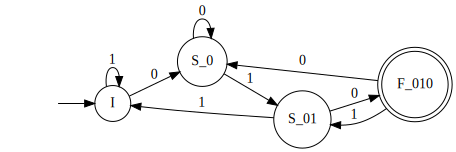

In [16]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

###Part b:
Computing the intersection with Even010

Now, obtain the intersection of Even010 (the DFA obtained in Question 2) and Ends010 using the function *intersect_dfa*. Obtain a description of this algorithm first.

In [17]:
# Use this method to get the intersection of the two DFAs
help(intersect_dfa)

Help on function intersect_dfa in module jove.Def_DFA:

intersect_dfa(D1in, D2in, flatten_states=False)
    In : D1in (consistent DFA)
         D2in (consistent DFA)
         If flatten_states (Boolean), it turns paired states into string    
    Out: DFA for language intersection of D1in, D2in (consistent DFA).



Now, go ahead and obtain the intersection

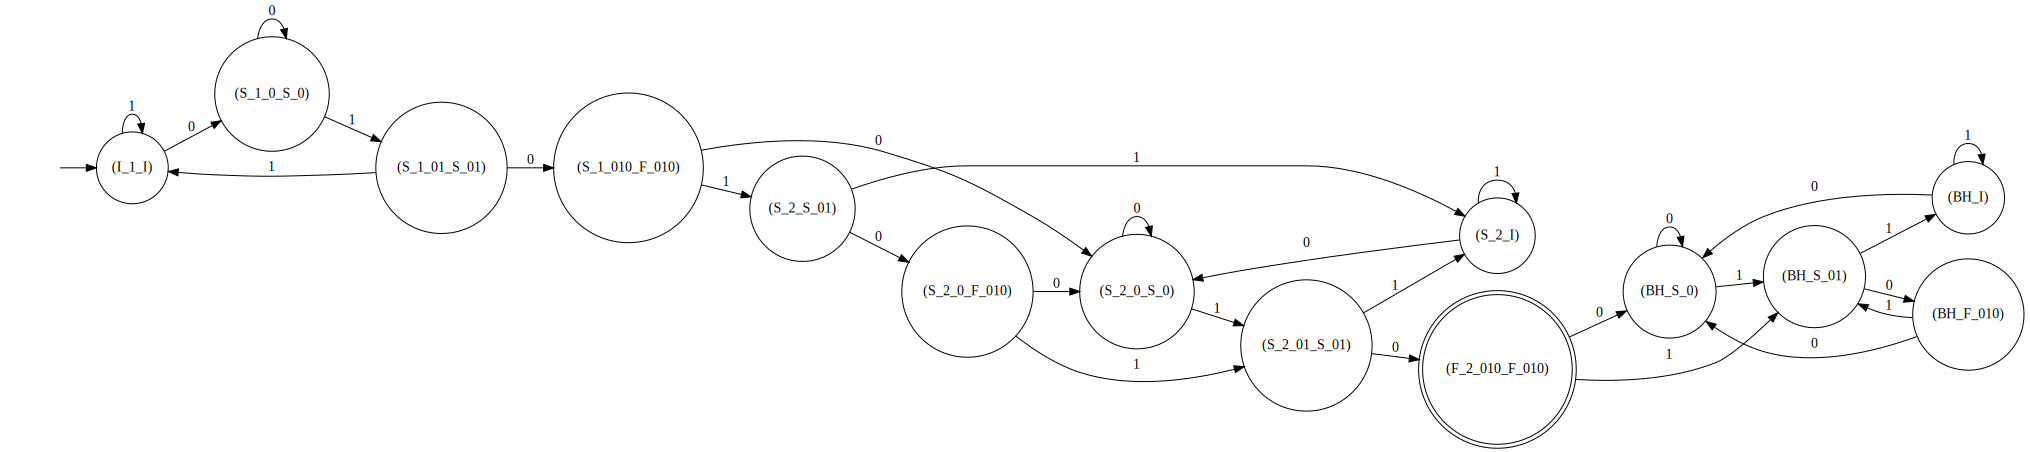

In [18]:
# FEED Even010 as the first argument and Ends010 as the second argument

#? Even010_Ends010 = ...obtain the intersection asked ...
#!

Even010_Ends010 = intersect_dfa(Even010, Ends010)

dotObj_dfa(Even010_Ends010) # Let's look at the resulting DFA

###Part c:
Minimizing the intersection

Now, minimize the intersection machine using another Jove function called *min_dfa*. Obtain its documentation first.

In [19]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



Now minimize Even010_Ends010, calling it min_Even010_Ends010 and look at the DFA also

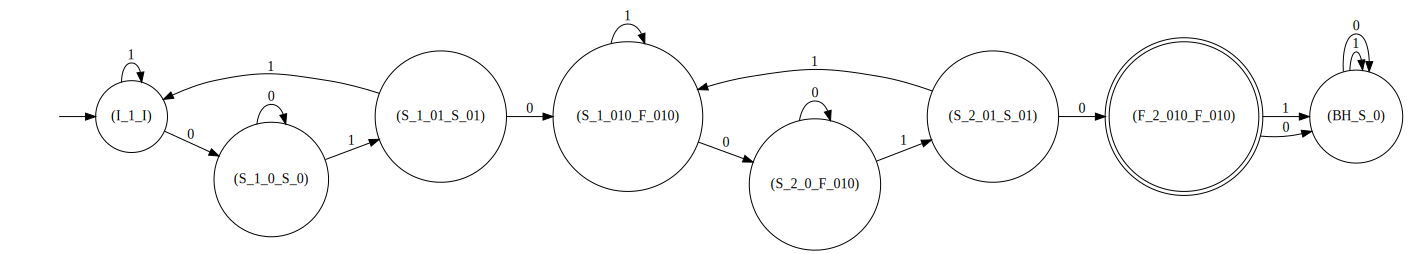

In [20]:
#? min_Even010_Ends010 =  ... # ... Use min_dfa - help(min_dfa) for guidance ...

min_Even010_Ends010 = min_dfa(Even010_Ends010)

dotObj_dfa(min_Even010_Ends010)

This is the end of this question. You'll be analyzing min_Even010_Ends010 in the following question.

## Question 4:

Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings. These are broken down into steps __a__ through __f__, below.

### Step a: Write Python code to find out which states were eliminated:

In [21]:
Original = Even010_Ends010["Q"]

In [22]:
Minimized = min_Even010_Ends010["Q"]

In [23]:
# Write an expression for the states missed
Original - Minimized

{('BH', 'F_010'),
 ('BH', 'I'),
 ('BH', 'S_01'),
 ('S_2', 'I'),
 ('S_2', 'S_01'),
 ('S_2_0', 'S_0')}

Hint: You can obtain the components of a DFA D by using the notation D["Q"] where

D is a DFA created using the md2mc command. Basically, "D" is a dictionary and D["Q"] obtains the value of the key at "Q".

Just try running a cell containing Even010_Ends010["Q"]
and you will see the states of this DFA being listed. Then you
can do this for min_Even010_Ends010 also

### Step b: Explain why it is OK to leave these states out.

Here is how you must form your answer in the "Answer"" field below that you must submit:

* **Pick the first state**  in "Original - Minimized" (call it  __S1__). This is the first state in Even010_Ends010 that is found missing in min_Even010_Ends010.  **Depending on how Python hashes, this first state may vary run-to-run. That is OK. Settle on one! **

* Now you want to argue that min_Even010_Ends010 is still correct. Proceed as follows.

* Find the shortest string, w,  in numeric order that reached __S1__ in Even010_Ends010

* Find the state that the same string w reaches in min_Even010_Ends010. Call that __S2__

* Since the DFA was correctly minimized, it must be the case that __S1__ and __S2__ are equivalent. Let us spot-check that this state equivalence holds.

* Note down the states that  __S1__ reaches on a $0$ and a $1$, respectively. Call those states __S10__ and __S11__ .

* Note down the states that  __S2__ reaches on a $0$ and a $1$, respectively. Call those states __S20__ and __S21__ .

* It must be the case that __S10__ is accepting iff __S20__ is accepting.

* Likewise, __S11__ is accepting iff __S21__ is accepting.

**Answer:**  Answer by editing these lines as per your machine:

* I find that state BH_F_010 is in Even010_Ends010 but is missing in min_Even010_Ends010

* I find that the shortest string, w, reaching BH_F_010 is w: 010101010

* Now I find that the same w reaches state S2 in min_Even010_Ends010 : BH_S_0

* Now upon 0, BH_F_010 goes to state BH_S_0 while BH_S_0 goes to BH_S_0, and they are both non-accepting.

* Upon a 1, BH_F_010 goes to BH_S_01 while BH_S_0 goes to BH_S_0 and they are both non-accepting.

* Thus I have spot-checked that the minimized machine is correctly produced.



# END